In [1]:
#----------------------------------Import Libraries---------------------------------#
import pandas as pd # importing all necessary Libraries 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import DBSCAN
from scipy import spatial as spatial


In [2]:
#----------------------------------Reading file-------------------------------------#
train_data = pd.read_csv("mnist-tsne-train.csv") # reading train data
test_data = pd.read_csv("mnist-tsne-test.csv") # reading test data

In [3]:
#-----------------------------------Defining all necessary functions------------------------#
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix=metrics.cluster.contingency_matrix(y_true, y_pred)
    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
    # Return cluster accuracy
    return contingency_matrix[row_ind,col_ind].sum()/np.sum(contingency_matrix)

def k_mean(k,data): # function for k-mean clustering
    kmeans = KMeans(n_clusters=k,random_state=42) 
    kmeans.fit(train_data.iloc[:,:2]) # fitting model
    kmeans_prediction = kmeans.predict(data) # prediction of data
    centers = kmeans.cluster_centers_ # getting centers of data
    distortion = kmeans.inertia_ # finding distortion 
    return kmeans_prediction,centers,distortion

def gmm(k,data): # function for gmm clustering
    gmm = GaussianMixture(n_components = k,random_state=42)    
    gmm.fit(train_data.iloc[:,:2]) # fitting model
    gmm_prediction = gmm.predict(data) # prediction of data
    centers = gmm.means_ # finding clusters means
    log_likelihood = gmm.lower_bound_ # finding log likelihood of model
    return gmm_prediction,centers,log_likelihood

def DB_SCAN(eps,min_sample): # function for DBSCAN
    dbscan_model=DBSCAN(eps=eps, min_samples=min_sample).fit(train_data.iloc[:,0:2]) # fitting model
    DBSCAN_predictions = dbscan_model.labels_ # prdiction of data
    return DBSCAN_predictions,dbscan_model

def dbscan_predict(dbscan_model, X_new, metric=spatial.distance.euclidean): # function to predict test data in DBSCAN
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1 
    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_):
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break
    return y_new

In [4]:
def Q1():
    print("-> 1(a).")
    pred,centers,dist = k_mean(10,train_data.iloc[:,:2]) # getting prediction, centers of clusster and distortion of k-mean clustering
    plt.scatter(train_data.iloc[:,0],train_data.iloc[:,1],c=pred,s=25) # scatter plot of clusters
    plt.scatter(centers[:,0],centers[:,1],color="black",s=70) # plotting clusters centers
    plt.title("K-Mean Clustering On Training Data")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()
    print("-> 1(b).\nPurity Score of K-Mean Clustering on Training Data:",purity_score(train_data.iloc[:,2],pred))# calculating purity score of traing data
    print("\n-> 1(c).")
    pred,centers,dist = k_mean(10,test_data.iloc[:,:2]) # similar thing is doing for test data
    plt.scatter(test_data.iloc[:,0],test_data.iloc[:,1],c=pred,s=25)
    plt.scatter(centers[:,0],centers[:,1],color="black",s=70)
    plt.title("K-Mean Clustering On Test Data")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()
    print("-> 1(d).\nPurity Score of K-Mean Clustering on Test Data:",purity_score(test_data.iloc[:,2],pred))


-> 1(a).


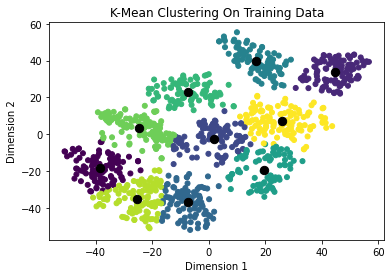

-> 1(b).
Purity Score of K-Mean Clustering on Training Data: 0.69

-> 1(c).


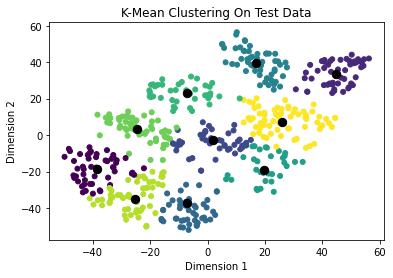

-> 1(d).
Purity Score of K-Mean Clustering on Test Data: 0.676


In [5]:
Q1()

In [6]:
#-----------------------------------Solution of QUESTION 2---------------------------------#
def Q2():
    print("-> 2(a).")
    pred,centers,log_likelihood = gmm(10,train_data.iloc[:,:2])# getting prediction, centers of clusster and log likelihood of gmm clustering
    plt.scatter(train_data.iloc[:,0],train_data.iloc[:,1],c=pred,s=25) # scatter plot of clusters
    plt.scatter(centers[:,0],centers[:,1],color="black",s=70) # plotting clusters centers
    plt.title("GMM Clustering On Training Data")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()
    print("-> 2(b).\nPurity Score of GMM based Clustering on Training Data:",purity_score(train_data.iloc[:,2],pred))# calculating purity score of traing data
    print("\n-> 2(c).")
    pred,centers,log_likelihood = gmm(10,test_data.iloc[:,:2])# similar thing is doing for test data
    plt.scatter(test_data.iloc[:,0],test_data.iloc[:,1],c=pred,s=25)
    plt.scatter(centers[:,0],centers[:,1],color="black",s=70)
    plt.title("GMM Clustering On Test Data")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()
    print("-> 2(d).\nPurity Score of GMM based Clustering on Test Data:",purity_score(test_data.iloc[:,2],pred))


-> 2(a).


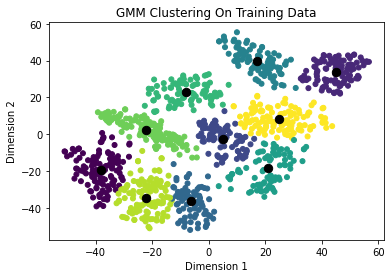

-> 2(b).
Purity Score of GMM based Clustering on Training Data: 0.708

-> 2(c).


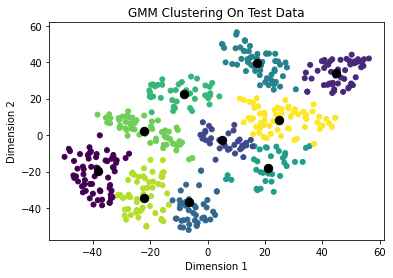

-> 2(d).
Purity Score of GMM based Clustering on Test Data: 0.704


In [7]:
Q2()

In [8]:
#-----------------------------------Solution of QUESTION 3---------------------------------#
def Q3():
    print("-> 3(a).")
    pred,model = DB_SCAN(5,10) # getting prediction and model of DBSCAN
    plt.scatter(train_data.iloc[:,0],train_data.iloc[:,1],c=pred,s=25) # scatter plot of clusters 
    plt.title("DBSCAN On Training Data")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()
    print("-> 3(b).\nPurity Score of DBSCAN Clustering on Training Data:",purity_score(train_data.iloc[:,2],pred))# calculating purity score of traing data
    print("\n-> 3(c).")
    dbtest = dbscan_predict(model, np.array(test_data.iloc[:,:2]), metric =spatial.distance.euclidean) # using dbtest function to get cluster for test data
    plt.scatter(test_data.iloc[:,0],test_data.iloc[:,1],c=dbtest,s=25) # scatter plot the test data
    plt.title("DBSCAN On Test Data")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()
    print("-> 3(d).\nPurity Score of DBSCAN Clustering on Test Data:",purity_score(test_data.iloc[:,2],dbtest))# calculating purity score of traing data


-> 3(a).


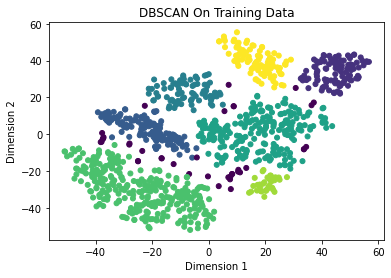

-> 3(b).
Purity Score of DBSCAN Clustering on Training Data: 0.585

-> 3(c).


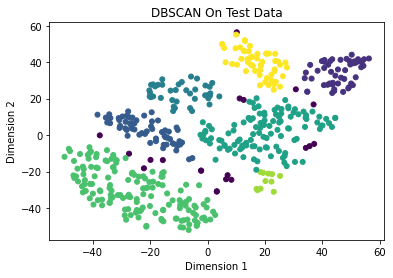

-> 3(d).
Purity Score of DBSCAN Clustering on Test Data: 0.584


In [9]:
Q3()

In [10]:
#-----------------------------------Solution of BONUS QUESTION---------------------------------#
def Bonus_Q():
    print("-----> Bonus-1.")
    distortion = [] # list of distortion of k-mean cluster for different values of k
    pur_scr_kmean = []
    k = [2,5,8,12,18,20] # list of k
    log_likelihood = [] # list of log likelihood of gmm-clusters for different values of k
    pur_scr_gmm = []
    for i in k: # looping over different value of k to get distortion and log_likelihood
        a,b,c = k_mean(i,train_data.iloc[:,:2])
        distortion.append(c);pur_scr_kmean.append(purity_score(train_data.iloc[:,2],a))
        a,b,c = gmm(i,train_data.iloc[:,:2])
        log_likelihood.append(c);pur_scr_gmm.append(purity_score(train_data.iloc[:,2],a))
    fig,axs=plt.subplots(1,2,figsize=(12,5)) # subpolting Elbow method for k-mean and gmm clusters
    axs[0].plot(k,distortion,color="red",label="K-Mean",marker="o",linestyle="-.") # elbow method for k-mean
    axs[0].set_title("Elbow Method for K-Mean Clustering")
    axs[0].set_xlabel("K")
    axs[0].set_ylabel("Distortion")
    axs[1].plot(k,log_likelihood,color="blue",label="GMM",marker="o",linestyle="-.") # elbow method for gmm
    axs[1].set_title("Elbow Method for GMM-Based Clustering")
    axs[1].set_xlabel("K")
    axs[1].set_ylabel("Log-likelihood")
    plt.show()
    
    print("Purity Score for Different K:") # showing purity score for different k in tabualar form
    data = {"K":k,"K-Mean":pur_scr_kmean,"GMM":pur_scr_gmm}
    data = pd.DataFrame(data)
    data = data.set_index(["K"])
    print(data)
    
    print("\n-----> Bonus-2.")
    fig,axs=plt.subplots(1,3,figsize=(12,5))
    fig.suptitle("DBSCAN with eps=1, 5, 10 and MinPoint=10")
    eps=[1,5,10] # setting different value of eps
    pur_eps=[]
    for i in range(3):
        pred,model = DB_SCAN(eps[i],10) # looping to get subplotting DBSCAN for different value of eps
        pur_eps.append(purity_score(train_data.iloc[:,2],pred))
        axs[i].scatter(train_data.iloc[:,0],train_data.iloc[:,1],c=pred,s=15)
        axs[i].set_title("eps = "+str(eps[i])+", MinPoint = 10")
        axs[i].set_xlabel("Dimension 1")
        axs[i].set_ylabel("Dimension 2")
    fig.tight_layout(pad=3.0)
    plt.show()
    print("Purity Score for Different eps:") # showing purity score for different k in tabualar form
    data = {"eps":eps,"Min Point":[10]*3,"DBSCAN":pur_eps}
    data = pd.DataFrame(data)
    data = data.set_index(["eps"])
    print(data)
    fig,axs=plt.subplots(2,2,figsize=(10,10))
    fig.suptitle("DBSCAN with eps=5 and MinPoint=1, 10, 30, 50")
    min_point=[1,10,30,50]# setting different value of min_point
    i,j=0,0
    pur_min = []
    for k in range(4):
        pred,model = DB_SCAN(5,min_point[k])# looping to get subplotting DBSCAN for different value of min_points    
        pur_min.append(purity_score(train_data.iloc[:,2],pred))
        axs[i,j].scatter(train_data.iloc[:,0],train_data.iloc[:,1],c=pred,s=15)
        axs[i,j].set_title("eps = 5 and MinPoint = "+str(min_point[k]))
        axs[i,j].set_xlabel("Dimension 1")
        axs[i,j].set_ylabel("Dimension 2")
        if k==1:
            i=1;j=0
        else: 
            j+=1
    fig.tight_layout(pad=3.0)
    plt.show()
    print("Purity Score for Different Min Point:") # showing purity score for different k in tabualar form
    data = {"eps":[5]*4,"Min Point":min_point,"DBSCAN":pur_min}
    data = pd.DataFrame(data)
    data = data.set_index(["eps"])
    print(data)

-----> Bonus-1.


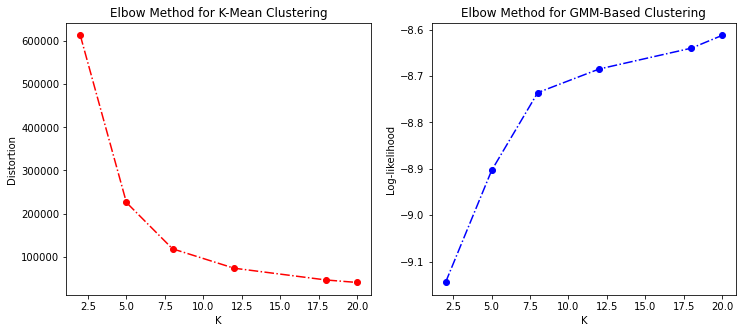

Purity Score for Different K:
    K-Mean    GMM
K                
2    0.200  0.200
5    0.393  0.460
8    0.630  0.629
12   0.611  0.660
18   0.481  0.508
20   0.432  0.455

-----> Bonus-2.


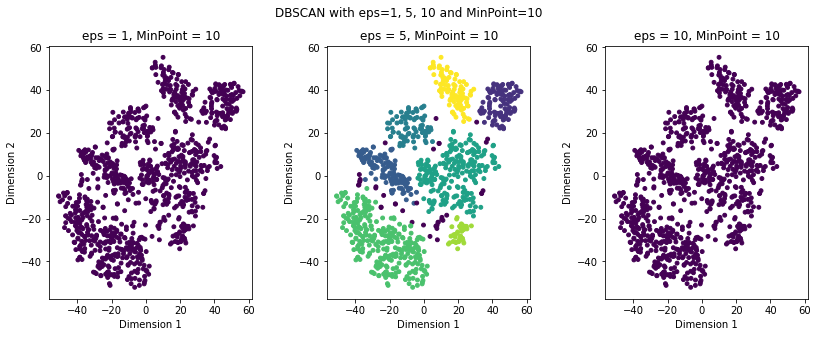

Purity Score for Different eps:
     Min Point  DBSCAN
eps                   
1           10   0.100
5           10   0.585
10          10   0.100


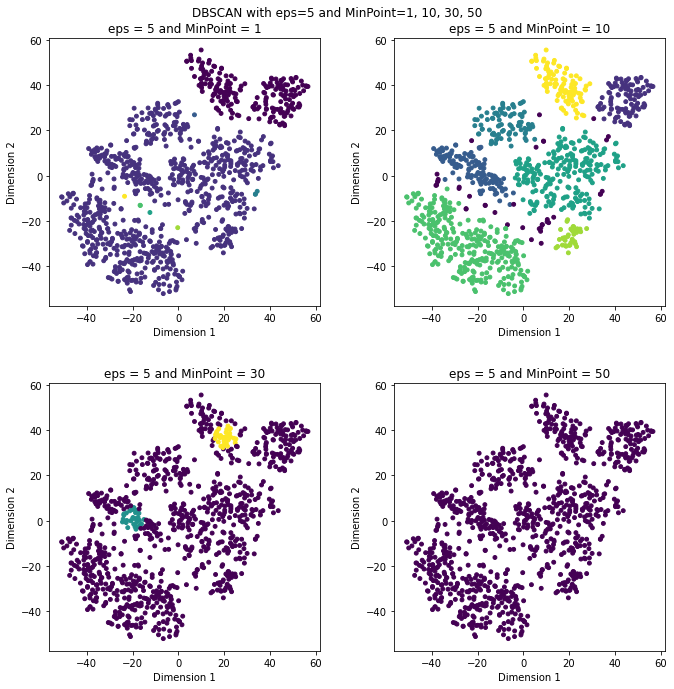

Purity Score for Different Min Point:
     Min Point  DBSCAN
eps                   
5            1   0.208
5           10   0.585
5           30   0.158
5           50   0.100


In [11]:
Bonus_Q()